In [2]:
import sys
sys.path.append('../scripts')

import project_functions
# This is called a relative import
import vari
    
clean_2015 = project_functions.hap_load_and_process(vari.h2015_data, vari.dict_2015,vari.list_2015)
clean_2016 = project_functions.hap_load_and_process(vari.h2016_data, vari.dict_2016,vari.list_2016)
clean_2017 = project_functions.hap_load_and_process(vari.h2017_data, vari.dict_2017,vari.list_2017)
clean_2018 = project_functions.hap_load_and_process(vari.h2018_data, vari.dict_2018,vari.list_2018)
clean_2019 = project_functions.hap_load_and_process(vari.h2019_data, vari.dict_2019,vari.list_2019)


clean_alco=project_functions.ind_load_and_process(vari.alco,'alco')
clean_alco=project_functions.clean_ind(clean_alco)
clean_alco=clean_alco.drop_duplicates()
clean_alco=clean_alco.reset_index(drop=True)
melted_clean_alco = clean_alco.melt(id_vars=['country','period'],value_vars = 'clean_alco',var_name='Variable',value_name='alco')
melted_clean_alco=melted_clean_alco.drop_duplicates()
melted_clean_alco=melted_clean_alco.reset_index(drop=True)


clean_homi=project_functions.ind_load_and_process(vari.homi,'homi')
clean_homi=project_functions.clean_ind(clean_homi)
clean_homi=clean_homi.drop_duplicates()
clean_homi=clean_homi.reset_index(drop=True)
melted_clean_homi = clean_homi.melt(id_vars=['country','period'],value_vars = 'clean_homi',var_name='Variable',value_name='homi')
melted_clean_homi=melted_clean_homi.drop_duplicates()
melted_clean_homi=melted_clean_homi.reset_index(drop=True)


clean_road=project_functions.ind_load_and_process(vari.road,'road')
clean_road=project_functions.clean_ind(clean_road)
clean_road=clean_road.drop_duplicates()
clean_road=clean_road.reset_index(drop=True)
melted_clean_road = clean_road.melt(id_vars=['country','period'],value_vars = 'road_acc',var_name='Variable',value_name='road')
melted_clean_road=melted_clean_road.drop_duplicates()
melted_clean_road=melted_clean_road.reset_index(drop=True)


clean_suic=project_functions.ind_load_and_process(vari.suic,'suic')
clean_suic=project_functions.clean_ind(clean_suic)
clean_suic=clean_suic.drop_duplicates()
clean_suic=clean_suic.reset_index(drop=True)
melted_clean_suic = clean_suic.melt(id_vars=['country','period'],value_vars = 'clean_suic',var_name='Variable',value_name='suic')
melted_clean_suic=melted_clean_suic.drop_duplicates()
melted_clean_suic=melted_clean_suic.reset_index(drop=True)

/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_12049/924179231.py:19: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_clean_alco = clean_alco.melt(id_vars=['country','period'],value_vars = 'clean_alco',var_name='Variable',value_name='alco')
/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_12049/924179231.py:28: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_clean_homi = clean_homi.melt(id_vars=['country','period'],value_vars = 'clean_homi',var_name='Variable',value_name='homi')
/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_12049/924179231.py:37: FutureWarning: This datafr

In [4]:
data_frames=[clean_2015,clean_2016,clean_2017,clean_2018,clean_2019]


hap_merged= project_functions.reduce(lambda  left,right: project_functions.pd.merge(left,right,on=['country'],
                                            how='inner'), data_frames)

master_data=hap_merged[['country','2015','2016','2017','2018','2019']]

just_scores=project_functions.pd.melt(master_data, id_vars=['country'], value_vars=['2015', '2016','2017', '2018','2019'])
just_scores=just_scores.rename(columns={"variable":"period","value":"h_index"})
just_scores=just_scores.sort_values(['country','period'],ascending=[True, True], ignore_index=True)
#just_scores=just_scores.sort_values(sorted(list(just_scores[['country']])), ignore_index=True)
#df.sort_values(['a', 'b'], ascending=[True, False])
just_scores['period']=just_scores['period'].astype(int)
just_scores

,country,period,h_index
0,Afghanistan,2015,3.575
1,Afghanistan,2016,3.360
2,Afghanistan,2017,3.794
3,Afghanistan,2018,3.632
4,Afghanistan,2019,3.203
...,...,...,...
700,Zimbabwe,2015,4.610
701,Zimbabwe,2016,4.193
702,Zimbabwe,2017,3.875
703,Zimbabwe,2018,3.692


In [14]:
melted_clean_homi=project_functions.pd.merge(just_scores,melted_clean_homi, on=['country','period'],how='inner')[['country','period','Variable','homi']]

In [15]:
melted_clean_road=project_functions.pd.merge(just_scores,melted_clean_road, on=['country','period'],how='inner')[['country','period','Variable','road']]

In [16]:
melted_clean_suic=project_functions.pd.merge(just_scores,melted_clean_suic, on=['country','period'],how='inner')[['country','period','Variable','suic']]


In [5]:
df_1=project_functions.pd.merge(just_scores,melted_clean_homi, on=['country','period'],how='inner')#[['country','period','Variable','homi']]
df_2=project_functions.pd.merge(df_1,melted_clean_road, on=['country','period'],how='inner')#[['country','period','Variable','road']]
df_3=project_functions.pd.merge(df_2,melted_clean_suic, on=['country','period'],how='inner')#[['country','period','Variable','road']]
df_3=df_3.drop_duplicates()


final_merged_noalco=df_3

final_merged_noalco[['period','h_index','homi','road','suic']] = final_merged_noalco[['period','h_index','homi','road','suic']].apply(project_functions.pd.to_numeric)
final_merged_noalco.to_csv('../../data/processed/h_ind_merged_noalco.csv',index=False)
#making str to num: https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/
final_merged_noalco.describe()
final_merged_noalco

,country,period,h_index,Variable_x,homi,Variable_y,road,Variable,suic
0,Afghanistan,2015,3.575,homi,14.44,road,4942.0,suic,3.57
1,Afghanistan,2015,3.575,homi,14.44,road,4942.0,suic,3.97
2,Afghanistan,2015,3.575,homi,14.44,road,4942.0,suic,4.34
3,Afghanistan,2015,3.575,homi,3.44,road,4942.0,suic,3.57
4,Afghanistan,2015,3.575,homi,3.44,road,4942.0,suic,3.97
...,...,...,...,...,...,...,...,...,...
5557,Zimbabwe,2019,3.663,homi,21.68,road,6037.0,suic,19.98
5558,Zimbabwe,2019,3.663,homi,21.68,road,6037.0,suic,8.79
5559,Zimbabwe,2019,3.663,homi,5.25,road,6037.0,suic,14.12
5560,Zimbabwe,2019,3.663,homi,5.25,road,6037.0,suic,19.98


In [30]:

melted_clean_alco=project_functions.pd.merge(just_scores,melted_clean_alco, on=['country','period'],how='inner')#[['country','period','Variable','alco']]
melted_clean_alco

,country,period,h_index,Variable,alco
0,Afghanistan,2015,3.575,alco,0
1,Afghanistan,2019,3.203,alco,0
2,Albania,2015,4.959,alco,10.3
3,Albania,2015,4.959,alco,2.4
4,Albania,2015,4.959,alco,6.4
...,...,...,...,...,...
714,Zimbabwe,2015,4.610,alco,5.3
715,Zimbabwe,2015,4.610,alco,9.3
716,Zimbabwe,2019,3.663,alco,1.6
717,Zimbabwe,2019,3.663,alco,4.5


In [31]:
h_alco=melted_clean_alco

h_alco[['period','h_index','alco']] = h_alco[['period','h_index','alco']].apply(project_functions.pd.to_numeric)
h_alco.to_csv('../../data/processed/h_alco.csv',index=False)
#making str to num: https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/
h_alco.describe()

,period,h_index,alco
count,719.000000,719.000000,719.000000
mean,2016.997218,5.485014,6.240334
std,2.001390,1.125695,5.424805
min,2015.000000,2.839000,0.000000
25%,2015.000000,4.598500,1.800000
50%,2015.000000,5.399000,4.800000
75%,2019.000000,6.277500,9.700000
max,2019.000000,7.769000,24.700000


In [ ]:
# Your Solution here
ax=project_functions.sns.pairplot(final_merged[['h_index','alco','homi','road','suic']], corner=True)
ax.fig.suptitle('Happiness by Indicators') #just setting title displays title on each plot


'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\npenguins = sns.load_dataset("penguins")\nhexplot = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", label=\'Blah\')\nplt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible\ncbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height\nplt.colorbar(cax=cbar_ax)\n\n# Source: https://www.py4u.net/discuss/159621\n'

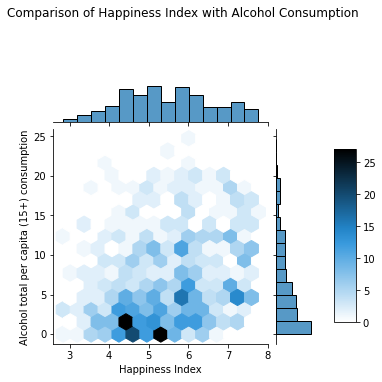

In [32]:
import matplotlib.pyplot as plt

figure1=project_functions.sns.jointplot(data=h_alco, x='h_index', y='alco', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure1.fig.suptitle('Comparison of Happiness Index with Alcohol Consumption')
figure1.set_axis_labels(xlabel = "Happiness Index",ylabel='Alcohol total per capita (15+) consumption')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure1.savefig('Hindex_alco.png')

'''
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
hexplot = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", label='Blah')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

# Source: https://www.py4u.net/discuss/159621
'''

#add legend/ color scale

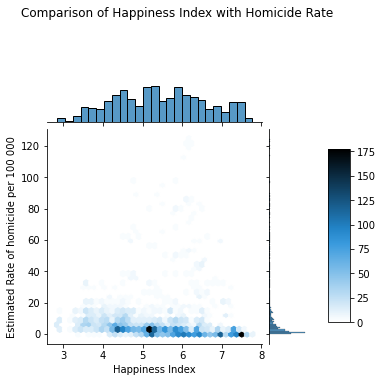

In [36]:
figure2=project_functions.sns.jointplot(data=final_merged_noalco, x='h_index', y='homi', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure2.fig.suptitle('Comparison of Happiness Index with Homicide Rate')
figure2.set_axis_labels(xlabel = "Happiness Index",ylabel='Estimated Rate of homicide per 100 000')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure2.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure2.savefig('Hindex_homi.png')

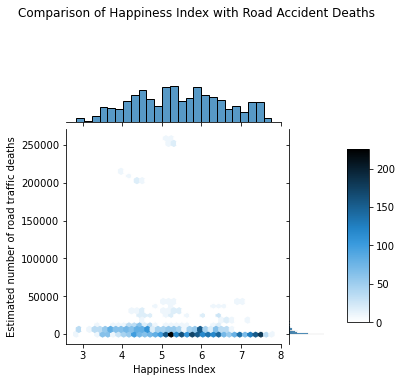

In [33]:
figure3=project_functions.sns.jointplot(data=final_merged_noalco, x='h_index', y='road', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure3.fig.suptitle('Comparison of Happiness Index with Road Accident Deaths')
figure3.set_axis_labels(xlabel = "Happiness Index",ylabel='Estimated number of road traffic deaths')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure3.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure3.savefig('Hindex_road.png')

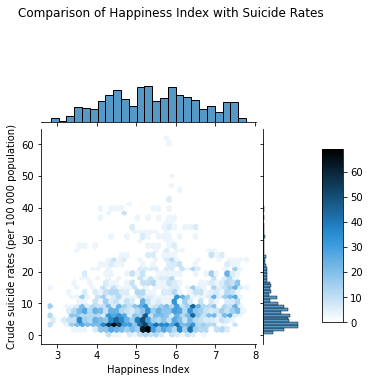

In [34]:
figure4=project_functions.sns.jointplot(data=final_merged_noalco, x='h_index', y='suic', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure4.fig.suptitle('Comparison of Happiness Index with Suicide Rates')
figure4.set_axis_labels(xlabel = "Happiness Index",ylabel='Crude suicide rates (per 100 000 population)')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure4.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure4.savefig('Hindex_suic.png')

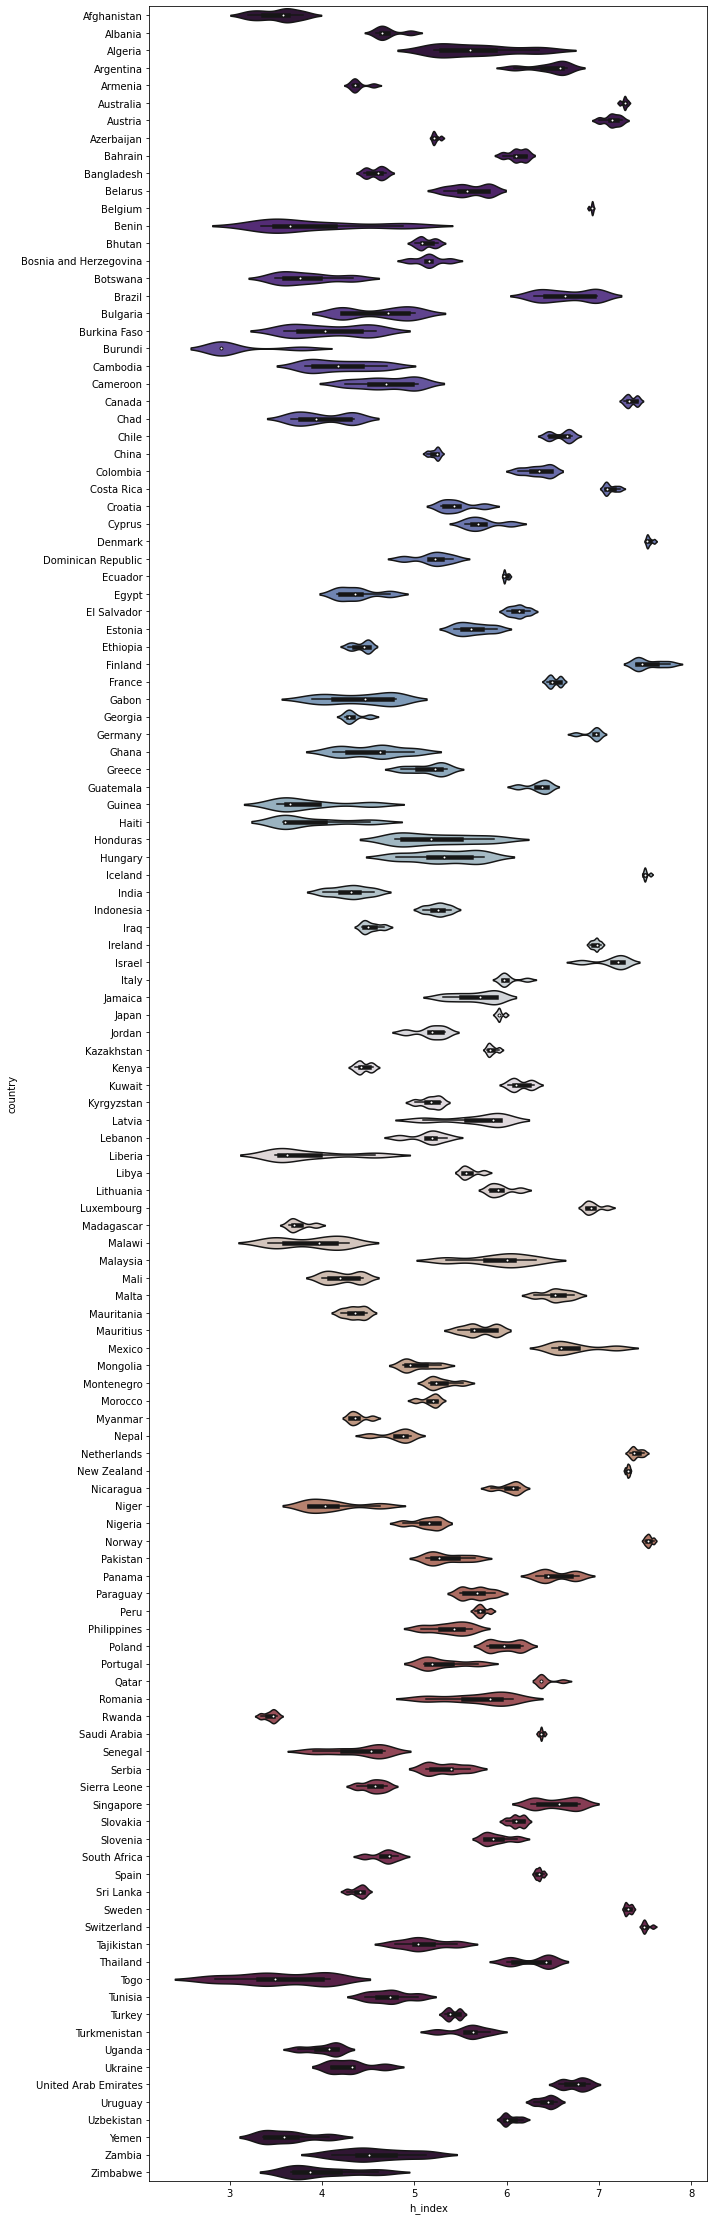

In [35]:
project_functions.pyplot.figure(figsize=(10, 40))
ax = project_functions.sns.violinplot(x="h_index", y='country',data=final_merged_noalco,palette="twilight_shifted",scale="width")
#ax.set(xlabel = "Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)",ylabel=None,title='Pokemon Types sorted by Cumulative Scores')
#ax.tick_params(axis='y', labelsize= 12)